# Backtesting an investment strategy based on model predictions
In this notebook we will compare the performance of a buy/sell strategy according to the predictions of opur model versus a simple buy and hold strategy.

In [152]:
import pandas as pd
import numpy as np
import ffn
import bt

import matplotlib as mpl
mpl.
%matplotlib inline


pd.set_option('display.max_rows', 15)

## Bitcoin prices

In [91]:
prices = pd.read_csv("Data/poloniex_data.csv")

In [92]:
prices = prices[["close","date"]]

In [93]:
prices

,close,date
0,1530.000000,2017-05-01
1,1561.907000,2017-05-02
2,1615.620000,2017-05-03
3,1603.898572,2017-05-04
4,1543.400000,2017-05-05
5,1598.205817,2017-05-06
6,1620.150000,2017-05-07
...,...,...
359,8860.024074,2018-04-25
360,9286.000000,2018-04-26


## Predictions

In [94]:
predictions = pd.read_csv("Data/nonlagged_predictions.csv", index_col = 0)

In [95]:
predictions

,predict,False,True
0,True,0.175136,0.824864
1,True,0.062958,0.937042
2,True,0.145614,0.854386
3,True,0.323121,0.676879
4,True,0.338793,0.661207
5,True,0.181857,0.818143
6,True,0.212622,0.787378
...,...,...,...
65,True,0.323303,0.676697
66,False,0.612654,0.387346


In [96]:
import pandas as pd
datelist = pd.date_range("17-02-2018", periods=72).tolist()

In [97]:
predictions["date"] = datelist

In [98]:
predictions = predictions.set_index("date")

In [99]:
predictions

,predict,False,True
date,,,
2018-02-17,True,0.175136,0.824864
2018-02-18,True,0.062958,0.937042
2018-02-19,True,0.145614,0.854386
2018-02-20,True,0.323121,0.676879
2018-02-21,True,0.338793,0.661207
2018-02-22,True,0.181857,0.818143
2018-02-23,True,0.212622,0.787378
...,...,...,...
2018-04-23,True,0.323303,0.676697


## Adapting prices time range to fit with test set.

The predictions we have only represent the last 63 days. But our data stopped at the 29/04/2018. ** We probably lost some data when doing dropna() **

In [100]:
prices = prices[:364]

In [101]:
prices

,close,date
0,1530.000000,2017-05-01
1,1561.907000,2017-05-02
2,1615.620000,2017-05-03
3,1603.898572,2017-05-04
4,1543.400000,2017-05-05
5,1598.205817,2017-05-06
6,1620.150000,2017-05-07
...,...,...
357,8934.977783,2018-04-23
358,9633.630952,2018-04-24


In [102]:
prices = prices[-72:]

In [103]:
prices

,close,date
292,11049.000000,2018-02-17
293,10379.000000,2018-02-18
294,11156.000000,2018-02-19
295,11217.165085,2018-02-20
296,10441.060500,2018-02-21
297,9845.538082,2018-02-22
298,10149.240000,2018-02-23
...,...,...
357,8934.977783,2018-04-23
358,9633.630952,2018-04-24


In [104]:
prices = prices.set_index("date")
prices

,close
date,
2018-02-17,11049.000000
2018-02-18,10379.000000
2018-02-19,11156.000000
2018-02-20,11217.165085
2018-02-21,10441.060500
2018-02-22,9845.538082
2018-02-23,10149.240000
...,...
2018-04-23,8934.977783


## Merge tables

In [105]:
data = pd.concat((prices, predictions), axis = 1)
data.to_csv("Data/backtest_data.csv")
data

,close,predict,False,True
date,,,,
2018-02-17,11049.000000,True,0.175136,0.824864
2018-02-18,10379.000000,True,0.062958,0.937042
2018-02-19,11156.000000,True,0.145614,0.854386
2018-02-20,11217.165085,True,0.323121,0.676879
2018-02-21,10441.060500,True,0.338793,0.661207
2018-02-22,9845.538082,True,0.181857,0.818143
2018-02-23,10149.240000,True,0.212622,0.787378
...,...,...,...,...
2018-04-23,8934.977783,True,0.323303,0.676697


## Backtesting the investment strategy

In [112]:
btc_price = data[["close","predict"]]
btc_price["close"] = btc_price["close"].rebase(100)
btc_price

/Users/viktormalesevic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,close,predict
date,,
2018-02-17,100.000000,True
2018-02-18,93.936103,True
2018-02-19,100.968413,True
2018-02-20,101.521994,True
2018-02-21,94.497787,True
2018-02-22,89.107956,True
2018-02-23,91.856639,True
...,...,...
2018-04-23,80.866846,True


In [138]:
btc_returns = btc_price.copy()
btc_returns["returns"] = btc_returns["close"].pct_change()
btc_returns["returns"] = btc_returns["returns"] #.shift(-1)
#btc_returns["strategy"] = btc_returns["close"]
#btc_returns["strategy"].loc[data[["predict"]] == False, btc_returns["strategy"]] = 0
btc_returns["strategy_returns"] = btc_returns["returns"]
btc_returns.loc[btc_returns["predict"] == False, "strategy_returns"] = 0

In [147]:
btc_returns["strategy_close"] = btc_returns["close"]
btc_returns["strategy_close"] = 100 * np.cumprod(btc_returns["strategy_returns"] + 1)

In [148]:
btc_returns

,close,predict,returns,strategy_returns,strategy_close
date,,,,,
2018-02-17,100.000000,True,NaN,NaN,NaN
2018-02-18,93.936103,True,-0.060639,-0.060639,93.936103
2018-02-19,100.968413,True,0.074863,0.074863,100.968413
2018-02-20,101.521994,True,0.005483,0.005483,101.521994
2018-02-21,94.497787,True,-0.069189,-0.069189,94.497787
2018-02-22,89.107956,True,-0.057037,-0.057037,89.107956
2018-02-23,91.856639,True,0.030847,0.030847,91.856639
...,...,...,...,...,...
2018-04-23,80.866846,True,0.016262,0.016262,99.202392


# Strategy based on predictions versus long position

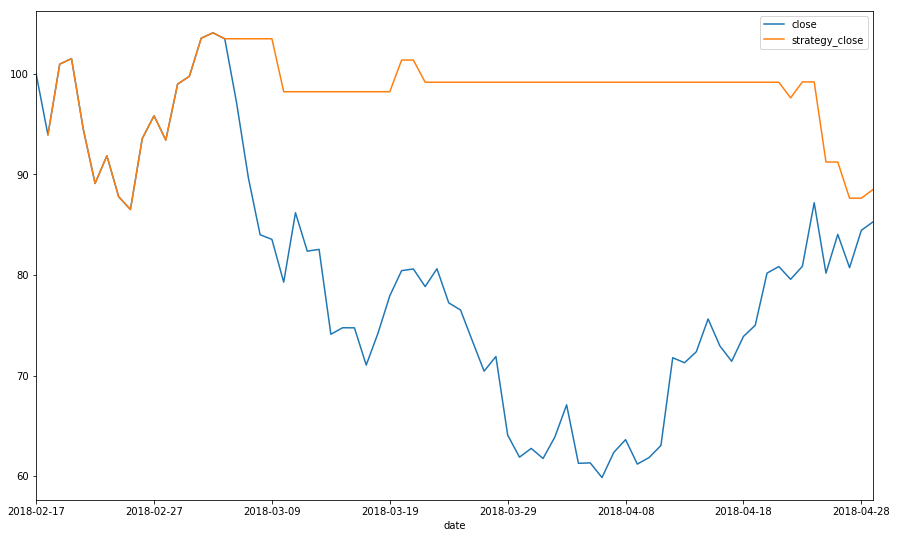

In [155]:
btc_returns[["close","strategy_close"]].plot(figsize = (15,9))